In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import csv
import requests
from PIL import Image, ImageDraw, ImageFont
import ast
from io import BytesIO


In [3]:
#Importing all the individual data sets first
player_df=pd.read_csv("../Common/player_info.csv")

# Removing all unnecessary data
We will first be removing columns that are prominently unnecessary for further analytics, then we will be exanding some of those columns that are nested list by itsef

In [267]:
#removing all of the names as we will now be referencing to the specific users only by the ID tag
player_df.drop(["challengeCardsWon","challengeMaxWins","tournamentCardsWon","tournamentBattleCount","warDayWins","name","role","donations","donationsReceived","totalDonations","clanCardsCollected","clan","badges","leagueStatistics","achievements","cards","bestTrophies"], axis=1, inplace=True)
for i in player_df:
    print(i)

tag
expLevel
trophies
wins
losses
battleCount
threeCrownWins
arena
currentDeck
currentFavouriteCard
starPoints
expPoints
totalExpPoints


# Data Cleaning

Dropping the outliers and adjusting the data to better fit our requirements.

## Determining Outliers & Removing Them

We will first plot out all of the box whisker diagrams to determine severe outliers which we will then filter and remove them for a much better data representation

<AxesSubplot:xlabel='expLevel'>

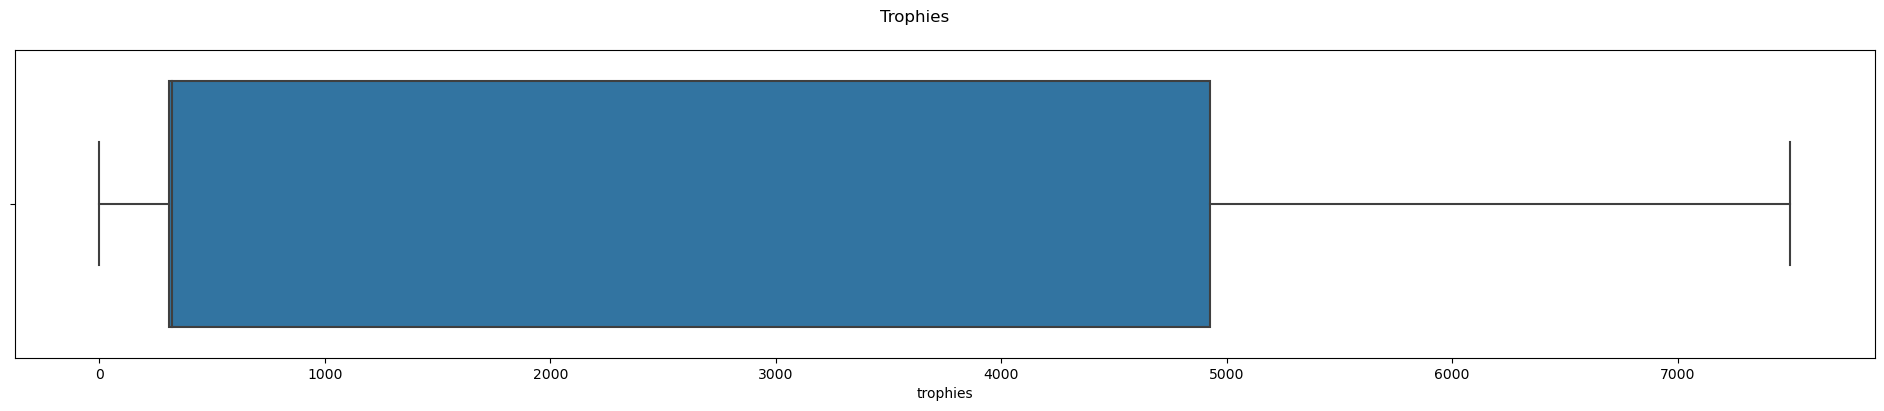

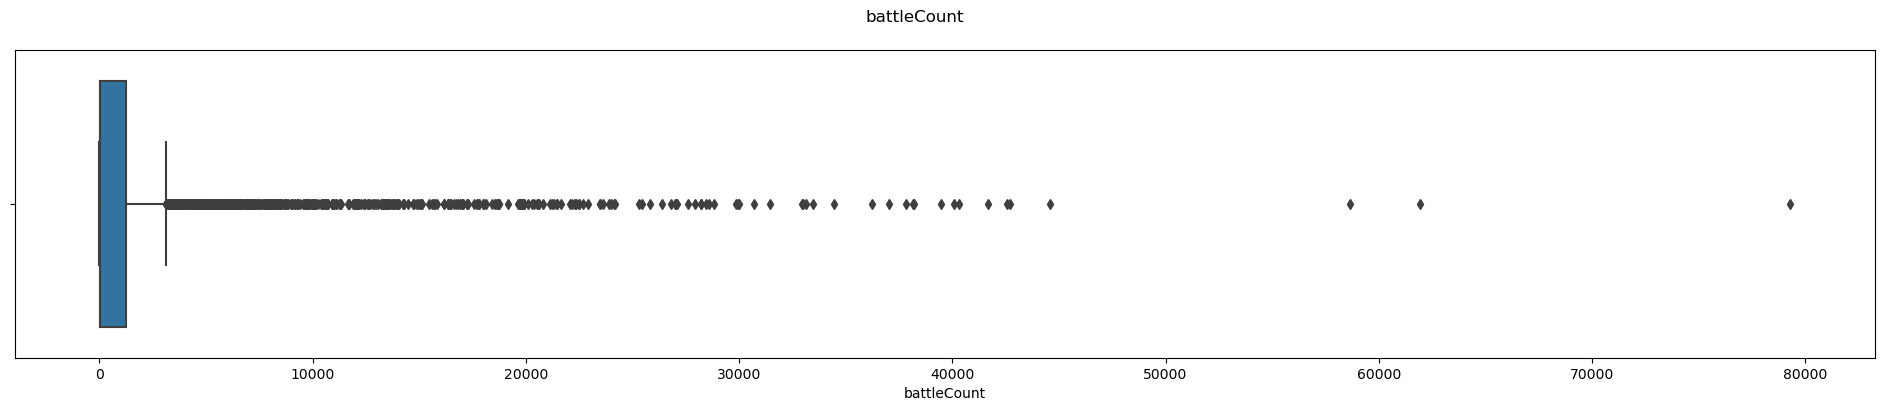

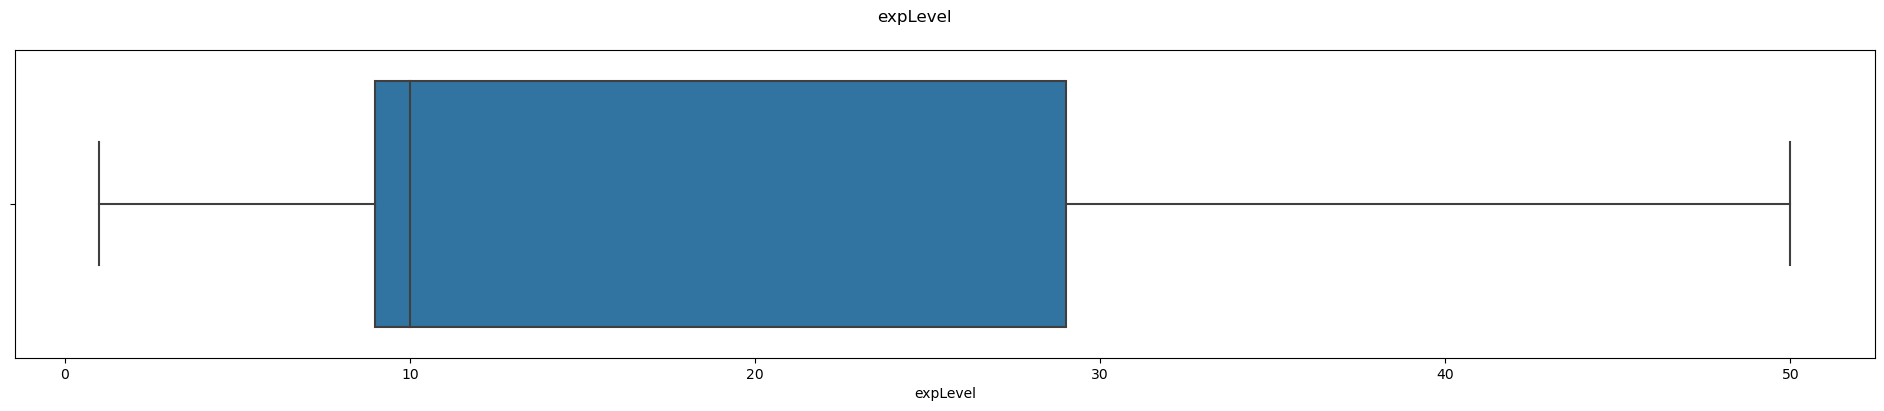

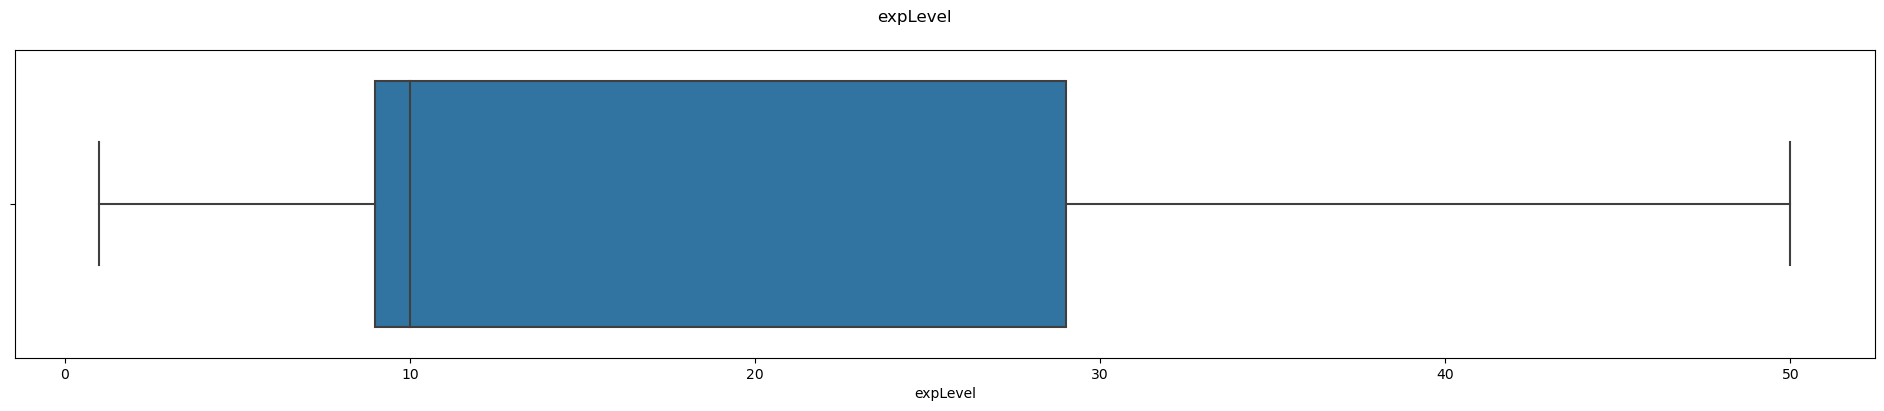

In [268]:
#Trophines
f = plt.figure(figsize=(24, 4))
f.suptitle("Trophies")
sb.boxplot(x = player_df['trophies'], orient = "h",)

#battleCount
f = plt.figure(figsize=(24, 4))
f.suptitle("battleCount")
sb.boxplot(x = player_df['battleCount'], orient = "h",)

#expLevel
f = plt.figure(figsize=(24, 4))
f.suptitle("expLevel")
sb.boxplot(x = player_df['expLevel'], orient = "h",)

#expPoints
f = plt.figure(figsize=(24, 4))
f.suptitle("expLevel")
sb.boxplot(x = player_df['expLevel'], orient = "h",)


In [269]:
#Removing player that have not played for more than  10 rounds for better analysis 
player_df_cleaned=player_df[player_df["battleCount"]>10]
player_df_cleaned=player_df_cleaned[player_df_cleaned["battleCount"]<40000]
player_df_cleaned=player_df_cleaned[player_df_cleaned["trophies"]>1000]

# Post Data Cleaning Results

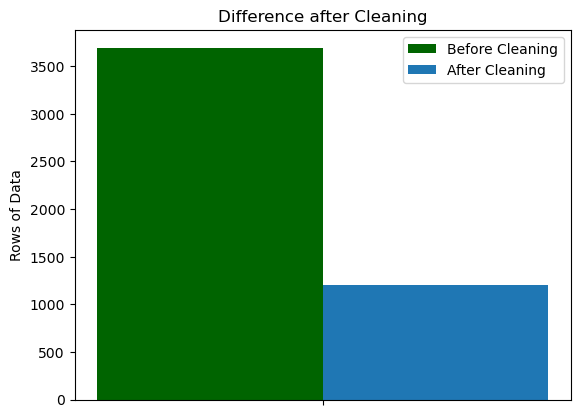

In [270]:
X = ['']
before = len(player_df)
after = len(player_df_cleaned)
  
X_axis = np.arange(1)
  
plt.bar(X_axis - 0.2, before, 0.4, label = 'Before Cleaning',color=['darkgreen'])
plt.bar(X_axis + 0.2, after, 0.4, label = 'After Cleaning')
  
plt.xticks(X_axis, X)
plt.ylabel("Rows of Data")
plt.title("Difference after Cleaning")
plt.legend()
plt.show()

<AxesSubplot:xlabel='trophies'>

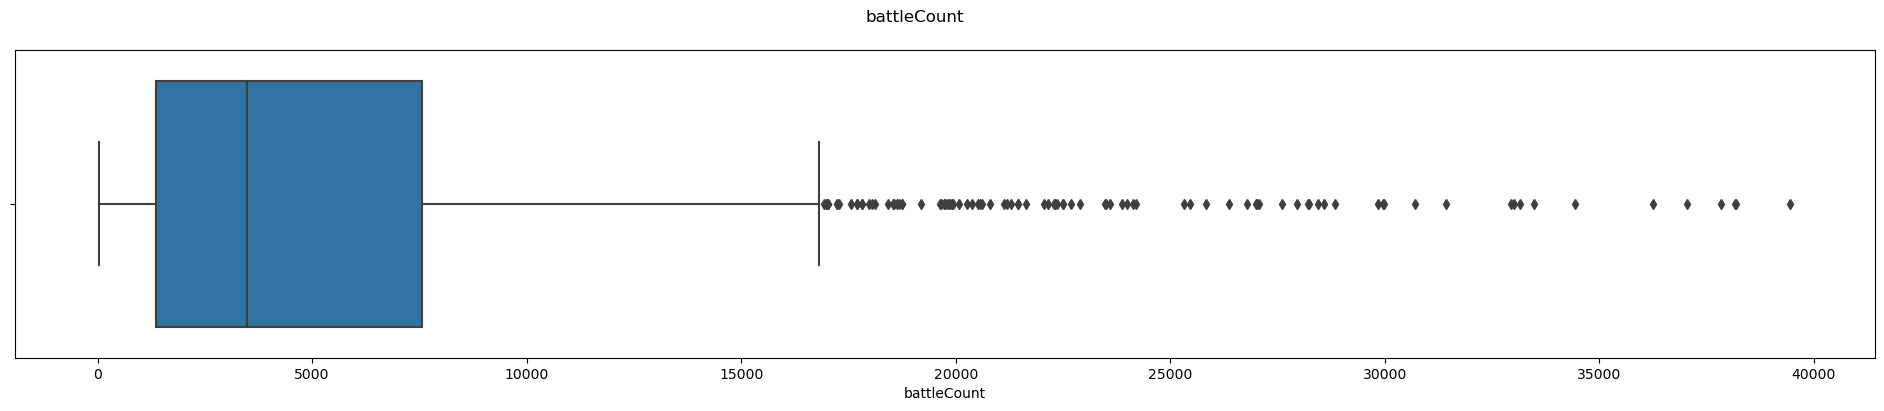

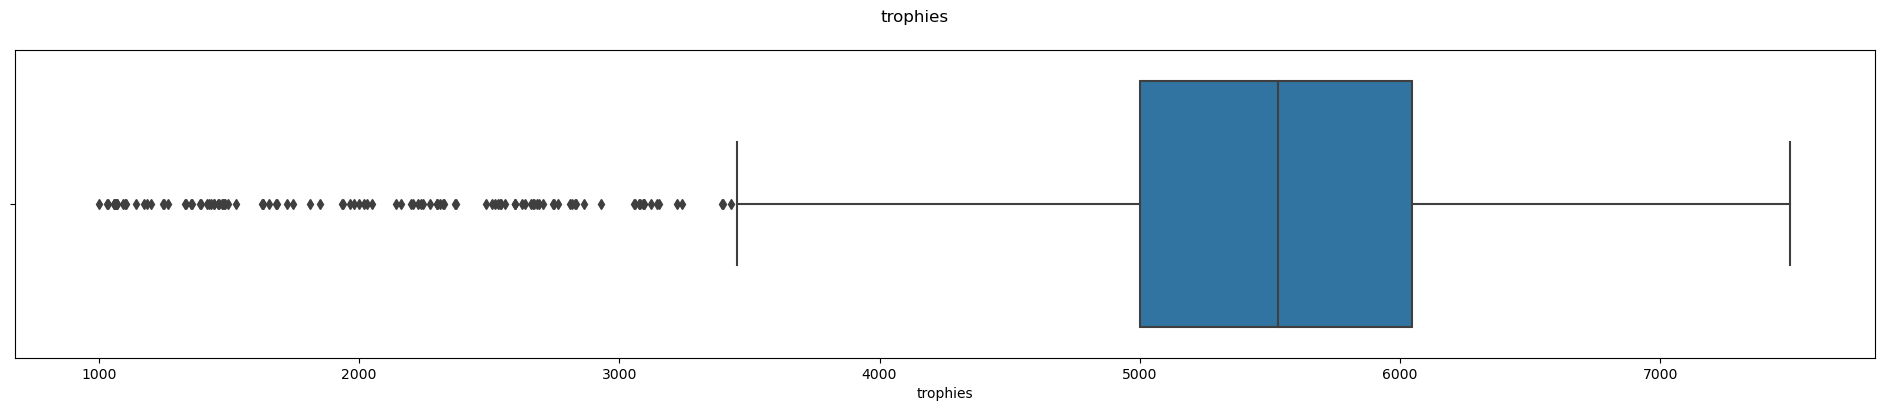

In [271]:
#battleCount
f = plt.figure(figsize=(24, 4))
f.suptitle("battleCount")
sb.boxplot(x = player_df_cleaned['battleCount'], orient = "h",)

f = plt.figure(figsize=(24, 4))
f.suptitle("trophies")
sb.boxplot(x = player_df_cleaned['trophies'], orient = "h",)

# Primary Data Analysis

For this primary Data analysis, we have a total of 3483 Unique Players from 100 clans.

In [272]:
player_df_cleaned.describe()

,expLevel,trophies,wins,losses,battleCount,threeCrownWins,starPoints,expPoints,totalExpPoints
count,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,34.573099,5274.245614,2257.269841,2104.546366,5842.203008,1158.472013,27389.618212,5904.572264,126032.555556
std,8.382019,1296.866929,2618.984246,2581.254883,6620.345347,1226.173700,43934.218502,5743.393715,118359.526266
min,5.000000,1002.000000,38.000000,2.000000,42.000000,17.000000,133.000000,0.000000,380.000000
25%,30.000000,5002.000000,589.000000,454.000000,1371.000000,332.000000,5097.000000,1327.000000,39484.000000
50%,35.000000,5530.000000,1289.000000,1185.000000,3491.000000,805.000000,11730.000000,4243.000000,90934.000000
75%,40.000000,6047.000000,2868.000000,2724.000000,7571.000000,1492.000000,30351.000000,8766.000000,171374.000000
max,50.000000,7500.000000,17423.000000,20655.000000,39453.000000,9784.000000,493371.000000,24973.000000,754040.000000


In [273]:
player_df_cleaned.shape

(1197, 13)

In [274]:
player_df_cleaned.isnull().sum()

tag                     0
expLevel                0
trophies                0
wins                    0
losses                  0
battleCount             0
threeCrownWins          0
arena                   0
currentDeck             0
currentFavouriteCard    0
starPoints              0
expPoints               0
totalExpPoints          0
dtype: int64

# Single Variable Data Representations

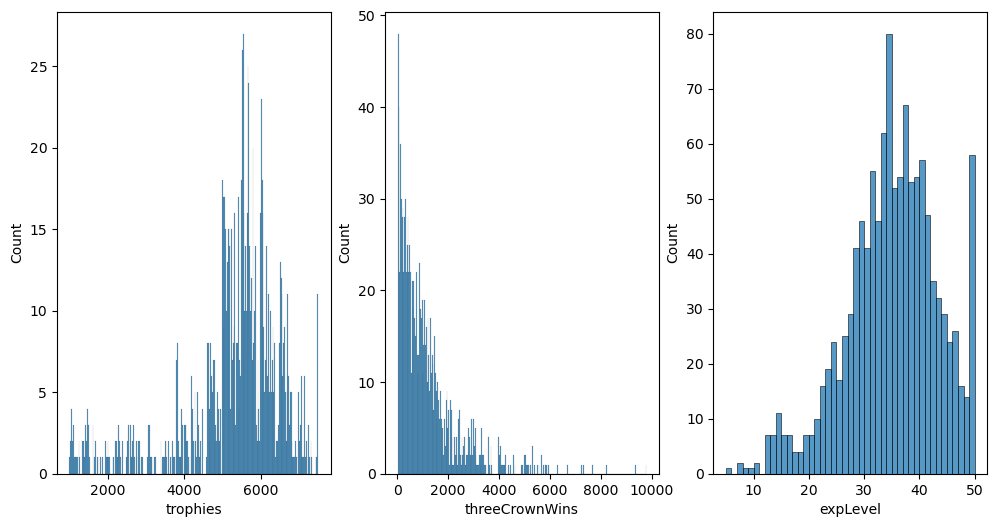

In [275]:
f, axes = plt.subplots(1, 3, figsize=(12, 6))
sb.histplot(player_df_cleaned["trophies"], bins = 300, ax=axes[0])
sb.histplot(player_df_cleaned["threeCrownWins"], bins = 300, ax=axes[1])
sb.histplot(player_df_cleaned["expLevel"], bins = 45, ax=axes[2])

plt.show()

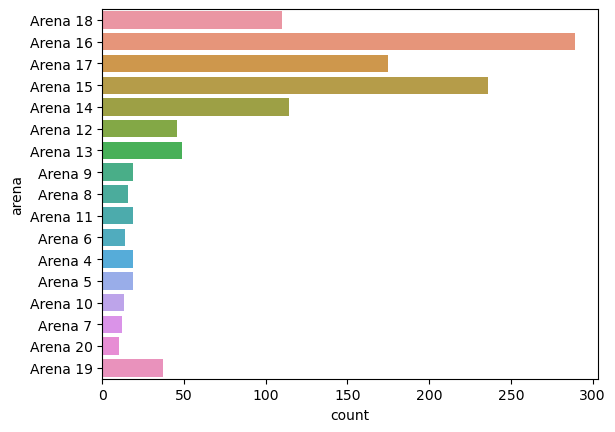

In [276]:
player_df_cleaned["arena"] = player_df_cleaned["arena"].apply(lambda x: eval(x))
sb.countplot(y=player_df_cleaned["arena"].map(lambda x: x["name"]), data=player_df_cleaned)# Show the plot
plt.show()

# Multi-Variable Data Representations

## Trophies x Wins

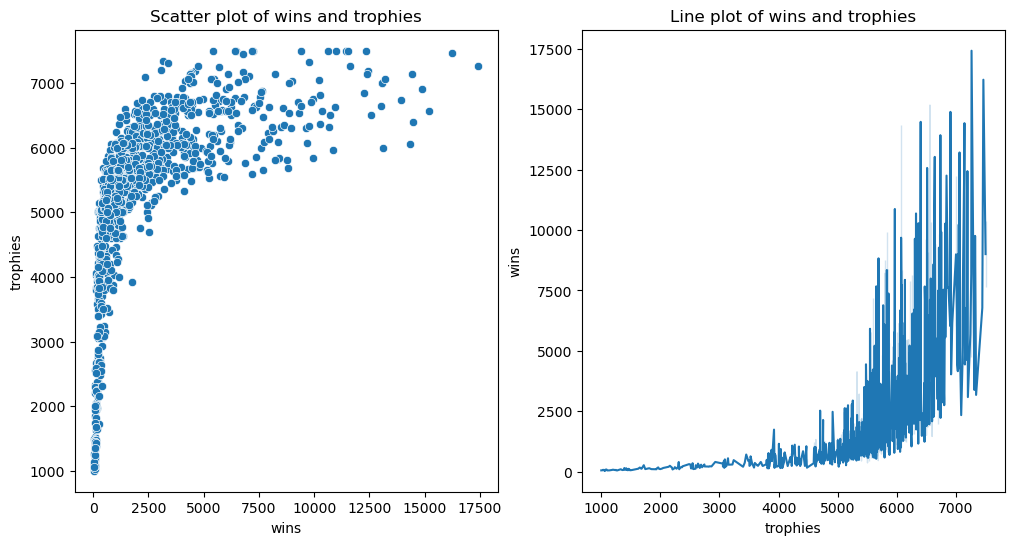

In [277]:
f, axes = plt.subplots(1, 2, figsize=(12, 6))

sb.scatterplot(x="wins", y="trophies", data=player_df_cleaned, ax=axes[0])
axes[0].set_title("Scatter plot of wins and trophies")

sb.lineplot(x='trophies', y='wins', data=player_df_cleaned, ax=axes[1])
axes[1].set_title("Line plot of wins and trophies")

plt.show()

## Win : Lose Ratio

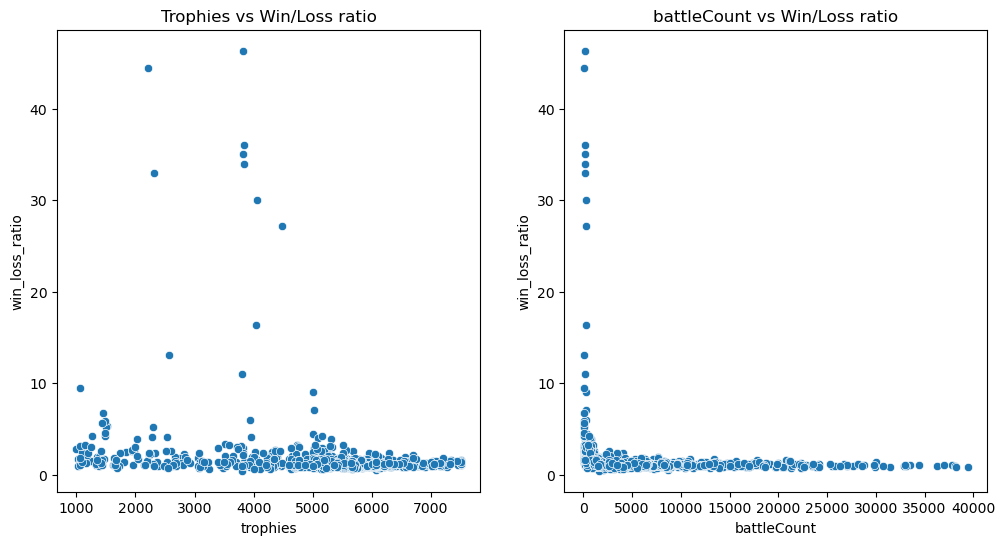

In [278]:
player_df_cleaned["win_loss_ratio"] = player_df_cleaned["wins"] / player_df_cleaned["losses"]
# Create a 2x2 subplot layout
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot a scatterplot and a histogram for the "trophies" and "win_loss_ratio" columns
sb.scatterplot(x="trophies", y="win_loss_ratio", data=player_df_cleaned, ax=axes[0])
sb.scatterplot(x="battleCount", y="win_loss_ratio", data=player_df_cleaned, ax=axes[1])


# Set titles for the plots
axes[0].set_title("Trophies vs Win/Loss ratio")
axes[1].set_title("battleCount vs Win/Loss ratio")

# Show the plots
plt.show()


# Card Comparisons

In [302]:
card_df=pd.read_csv("card_info.csv")

for url in card_df["iconUrls"]:
    url_dict = ast.literal_eval(url)
    png_url = url_dict['medium']
    response = requests.get(png_url)
    img = Image.open(BytesIO(response.content))

        # Create a new image with the card name at the bottom
    new_img = Image.new('RGBA', (img.width, img.height+30), (255, 255, 255, 255))
    new_img.paste(img, (0, 0))
    new_img.save(f'{card_id}.png')